# Se analizara data set de League of Legends

In [146]:
import pandas as pd
import numpy as np
import DataClean

DataClean crea un archivo de texto con la informacion relevante del data set

In [147]:
df = pd.read_csv('data/LeagueofLegends.csv')
DataClean.first_view(df)

In [148]:
df.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


Debido a que existen pocos na se opta por dropear a todas las filas con estos N/A

In [149]:
df.dropna(inplace=True)

Se desacen las columnas no necesarias

* Address

In [150]:
df_clean = df.drop(columns = 'Address')

**Debido a que cada año riot games cambia radicalmente diversas cosas en LoL, el datframe se divide en las respectivas temporadas desde la cuarta hasta la octava**

In [151]:
df_S4 = df_clean.loc[df.Year == 2014]
df_S5 = df_clean.loc[df.Year == 2015]
df_S6 = df_clean.loc[df.Year == 2016]
df_S7 = df_clean.loc[df.Year == 2017]
df_S8 = df_clean.loc[df.Year == 2018]

In [153]:
df_S4.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddle,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans
6391,WC,2014,Summer,International,EDG,0,1,SSW,44,"[0, 0, 13, -33, 151, -82, 156, 90, -552, 391, ...",...,PawN,Zilean,"[475, 475, 532, 802, 1093, 1397, 1612, 1848, 2...",imp,Tristana,"[475, 475, 532, 825, 1140, 1400, 1683, 2001, 2...",Mata,Nami,"[515, 515, 582, 737, 909, 1075, 1220, 1409, 15...","['Twitch', 'Ryze', 'Janna']"
6392,WC,2014,Summer,International,TSM,1,0,SK,24,"[40, 40, 44, 144, 23, 668, 706, 928, 1017, 151...",...,Jesiz,Orianna,"[475, 475, 532, 830, 1189, 1371, 1585, 1809, 2...",CandyPanda,Lucian,"[475, 475, 532, 811, 1112, 1410, 1683, 2028, 2...",nRated,Sona,"[475, 475, 539, 680, 826, 982, 1122, 1274, 141...","['Lulu', 'Zed', 'Syndra']"
6393,WC,2014,Summer,International,DP,0,1,AHQ,41,"[0, 0, 6, -37, -3, 101, 200, 97, -490, -128, -...",...,westdoor,Fizz,"[475, 475, 532, 788, 1103, 1391, 1588, 1933, 2...",GarnetDevil,Lucian,"[475, 475, 532, 844, 1150, 1443, 1727, 1969, 2...",GreenTea,Thresh,"[515, 515, 577, 709, 900, 1050, 1203, 1343, 15...","['Alistar', 'Ryze', 'Zilean']"
6394,WC,2014,Summer,International,TPA,0,1,SHR,57,"[-40, -50, -55, -126, 411, 466, 134, 107, -298...",...,corn,Orianna,"[475, 475, 533, 835, 1050, 1373, 1722, 1968, 2...",Uzi,Caitlyn,"[475, 475, 533, 830, 1184, 1499, 1931, 2175, 2...",Zero,Nami,"[515, 535, 609, 784, 962, 1125, 1369, 1507, 18...","['Alistar', 'Nidalee', 'Zilean']"
6395,WC,2014,Summer,International,SSW,1,0,AHQ,23,"[0, 0, 1798, 1780, 2475, 2704, 4124, 3899, 542...",...,westdoor,TwistedFate,"[475, 475, 561, 779, 1077, 1318, 1520, 1926, 2...",GarnetDevil,Jinx,"[475, 475, 561, 841, 1111, 1321, 1515, 1843, 2...",GreenTea,Blitzcrank,"[515, 515, 620, 764, 920, 1049, 1209, 1334, 14...","['Alistar', 'Ryze', 'Zilean']"


In [164]:
rwin_s4 = df_S4.loc[df_S4.rResult == 1]
bwin_s4 = df_S4.loc[df_S4.bResult == 1]

In [178]:
import seaborn as sns

/home/giovannyencinia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/giovannyencinia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


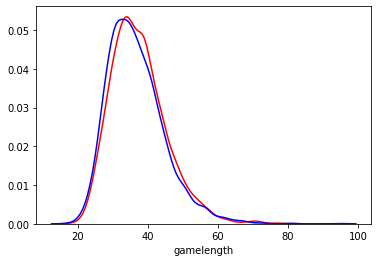

In [185]:
redWins = df[df.rResult == 1]
blueWins = df[df.bResult == 1]

sns.distplot(redWins.gamelength, color='red', hist=False)
sns.distplot(blueWins.gamelength, color='blue', hist=False)